## **Feynn Labs - Machine Learning Internship**

### **Task - Analysing users review and ratings for E2W vehicles.**

**Importing Libraries & Loading the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_e2w = pd.read_csv('/content/E2W user reviews.csv')

**Exploratory Data Analysis & Visualization**

In [ ]:
df_e2w.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Wanna buy this bike so i gave basic informatio...,Everything,Never owned,NaN,1,3.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN
1,This is simply amazing and exceptionally well ...,Everything,> 1 yr,< 5000 kms,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
2,"Battery life is good, I like this bike very mu...",Everything,< 3 months,< 5000 kms,5,4.0,4.0,5.0,3.0,NaN,4.0,NaN,NaN
3,I seen this bike on road. Very nice bike and g...,Everything,Never owned,NaN,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
4,I have a rv400 I have the bike for almost more...,Daily Commute,> 1 yr,5000-10000 kms,1,2.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN


In [ ]:
df_e2w.shape

(812, 13)

In [ ]:
df_e2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              769 non-null    object 
 1   Used it for         812 non-null    object 
 2   Owned for           812 non-null    object 
 3   Ridden for          640 non-null    object 
 4   rating              812 non-null    int64  
 5   Visual Appeal       711 non-null    float64
 6   Reliability         688 non-null    float64
 7   Performance         624 non-null    float64
 8   Service Experience  681 non-null    float64
 9   Extra Features      568 non-null    float64
 10  Comfort             202 non-null    float64
 11  Maintenance cost    88 non-null     float64
 12  Value for Money     84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 82.6+ KB


The null values over here means that the user didn't provide their rating, its not a missing value.

In [ ]:
df_e2w.describe()

,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
count,812.000000,711.000000,688.000000,624.000000,681.000000,568.000000,202.000000,88.000000,84.000000
mean,3.347291,3.772152,3.302326,3.573718,3.196769,3.403169,3.044554,3.375000,3.214286
std,1.689185,1.351623,1.589227,1.438191,1.634928,1.488743,1.596948,1.472448,1.513565
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.750000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.250000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


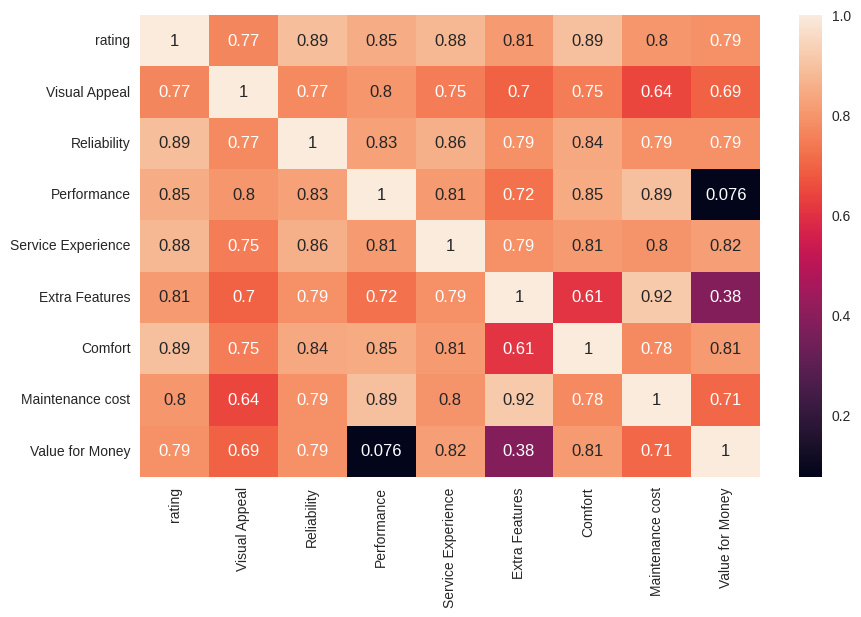

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_e2w.corr(), annot = True)
plt.show()

Most of the attributes have good correlation with other attributes

In [ ]:
df_e2w['Used it for'].value_counts(normalize=True)*100

Daily Commute         71.551724
Everything            18.965517
Occasional Commute     6.403941
Leisure Rides          2.093596
Tours                  0.985222
Name: Used it for, dtype: float64

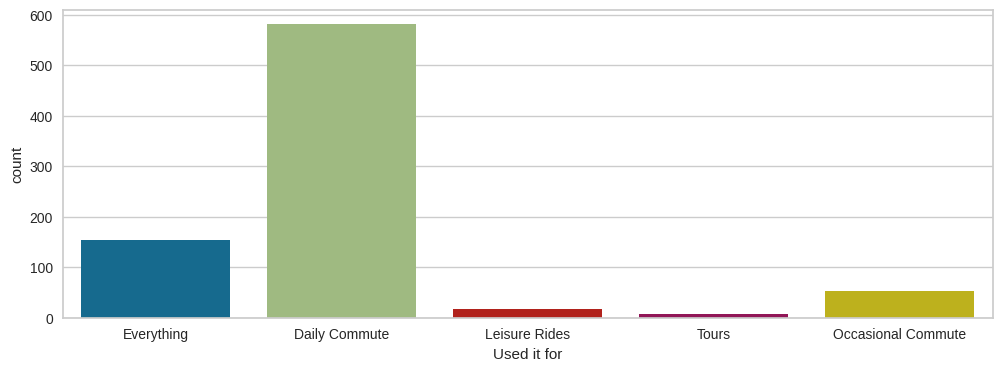

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Used it for', data=df_e2w)
plt.show()

In [ ]:
df_e2w['Owned for'].value_counts(normalize=True)*100

< 3 months            25.985222
> 1 yr                24.014778
Never owned           21.059113
6 months-1 yr         15.886700
3-6 months            12.931034
Occasional Commute     0.123153
Name: Owned for, dtype: float64

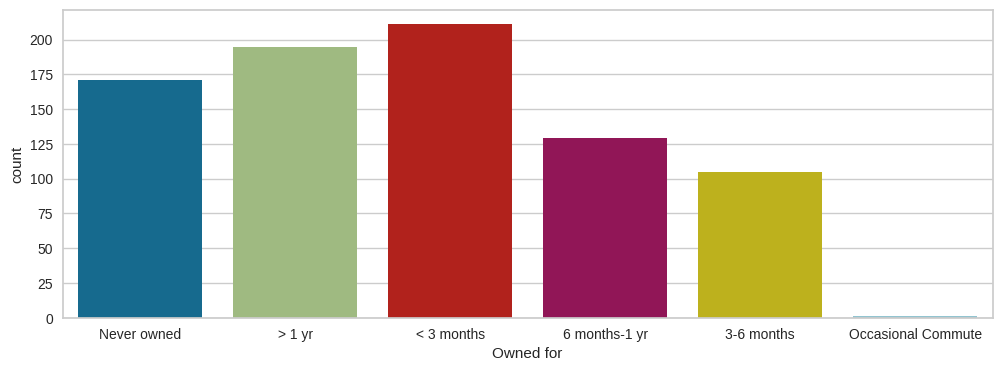

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Owned for', data=df_e2w)
plt.show()

Most of the users owned an EV for less than 3 months, greater than a year. Some of them didn't even own an EV.

In [ ]:
df_e2w['Ridden for'].value_counts(normalize=True)*100

< 5000 kms         68.59375
5000-10000 kms     20.78125
> 15000 kms         5.78125
10000-15000 kms     4.68750
Never owned         0.15625
Name: Ridden for, dtype: float64

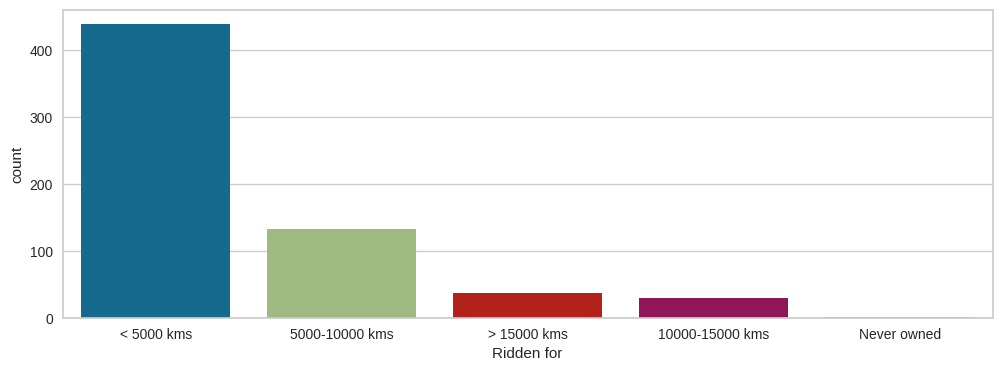

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Ridden for', data=df_e2w)
plt.show()

Most of the users drove over less than 5000kms.

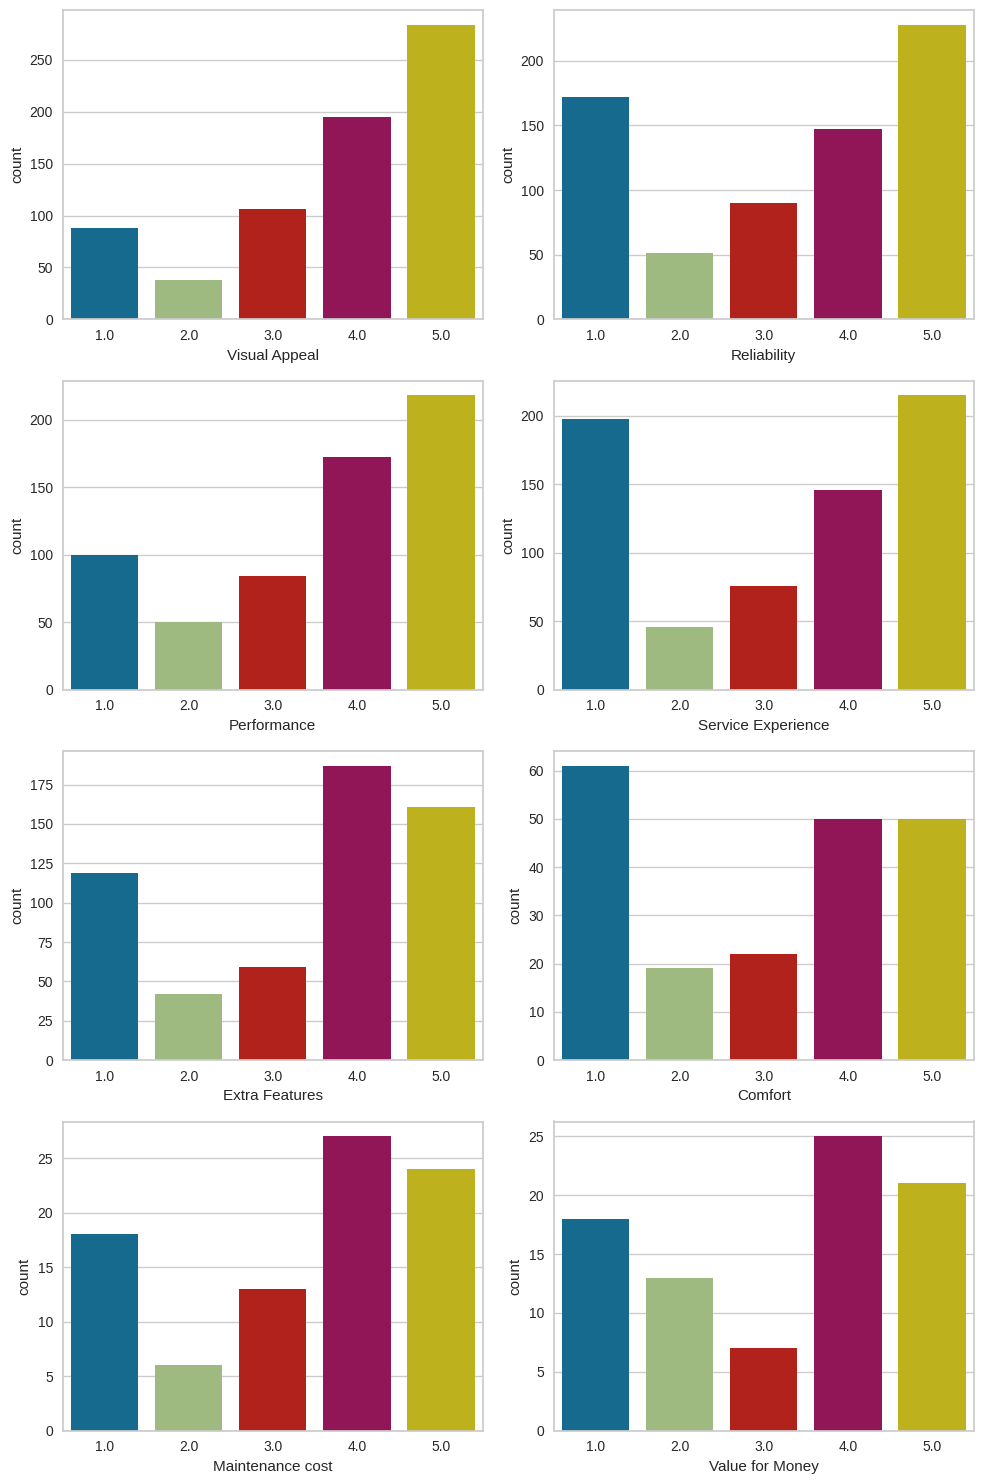

In [ ]:
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Visual Appeal', data=df_e2w, ax=axes[0][0])
sns.countplot(x='Reliability', data=df_e2w, ax=axes[0][1])
sns.countplot(x='Performance', data=df_e2w, ax=axes[1][0])
sns.countplot(x='Service Experience', data=df_e2w, ax=axes[1][1])
sns.countplot(x='Extra Features', data=df_e2w, ax=axes[2][0])
sns.countplot(x='Comfort', data=df_e2w, ax=axes[2][1])
sns.countplot(x='Maintenance cost', data=df_e2w, ax=axes[3][0])
sns.countplot(x='Value for Money', data=df_e2w, ax=axes[3][1])
plt.show()

People seem to be positive regarding the Visual Appeal, Performance and Extra Features, they have provided negative reviews regarding the Comfort and mixed reviews regarding the Reliability, Service Experience, Maintenance cost. Some of the users consider E2W as Value for Money, while some do not.

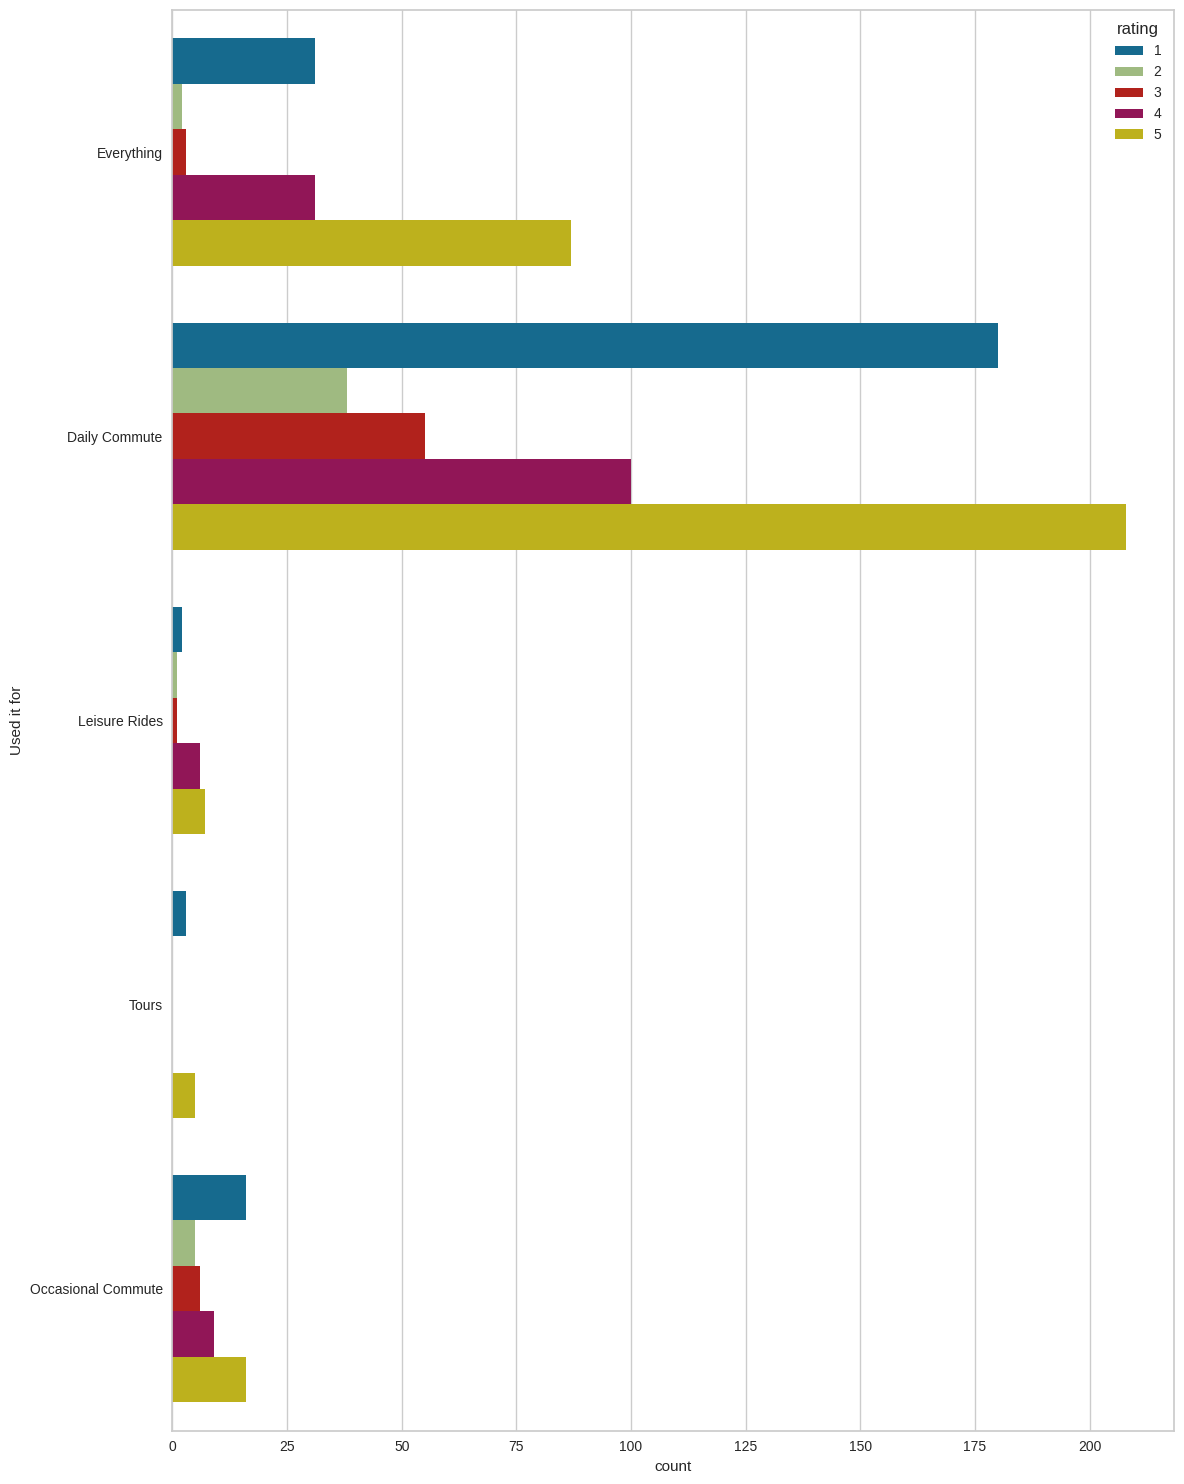

In [ ]:
plt.figure(figsize=(12,15))
sns.countplot(y='Used it for', data=df_e2w, hue='rating')
plt.show()

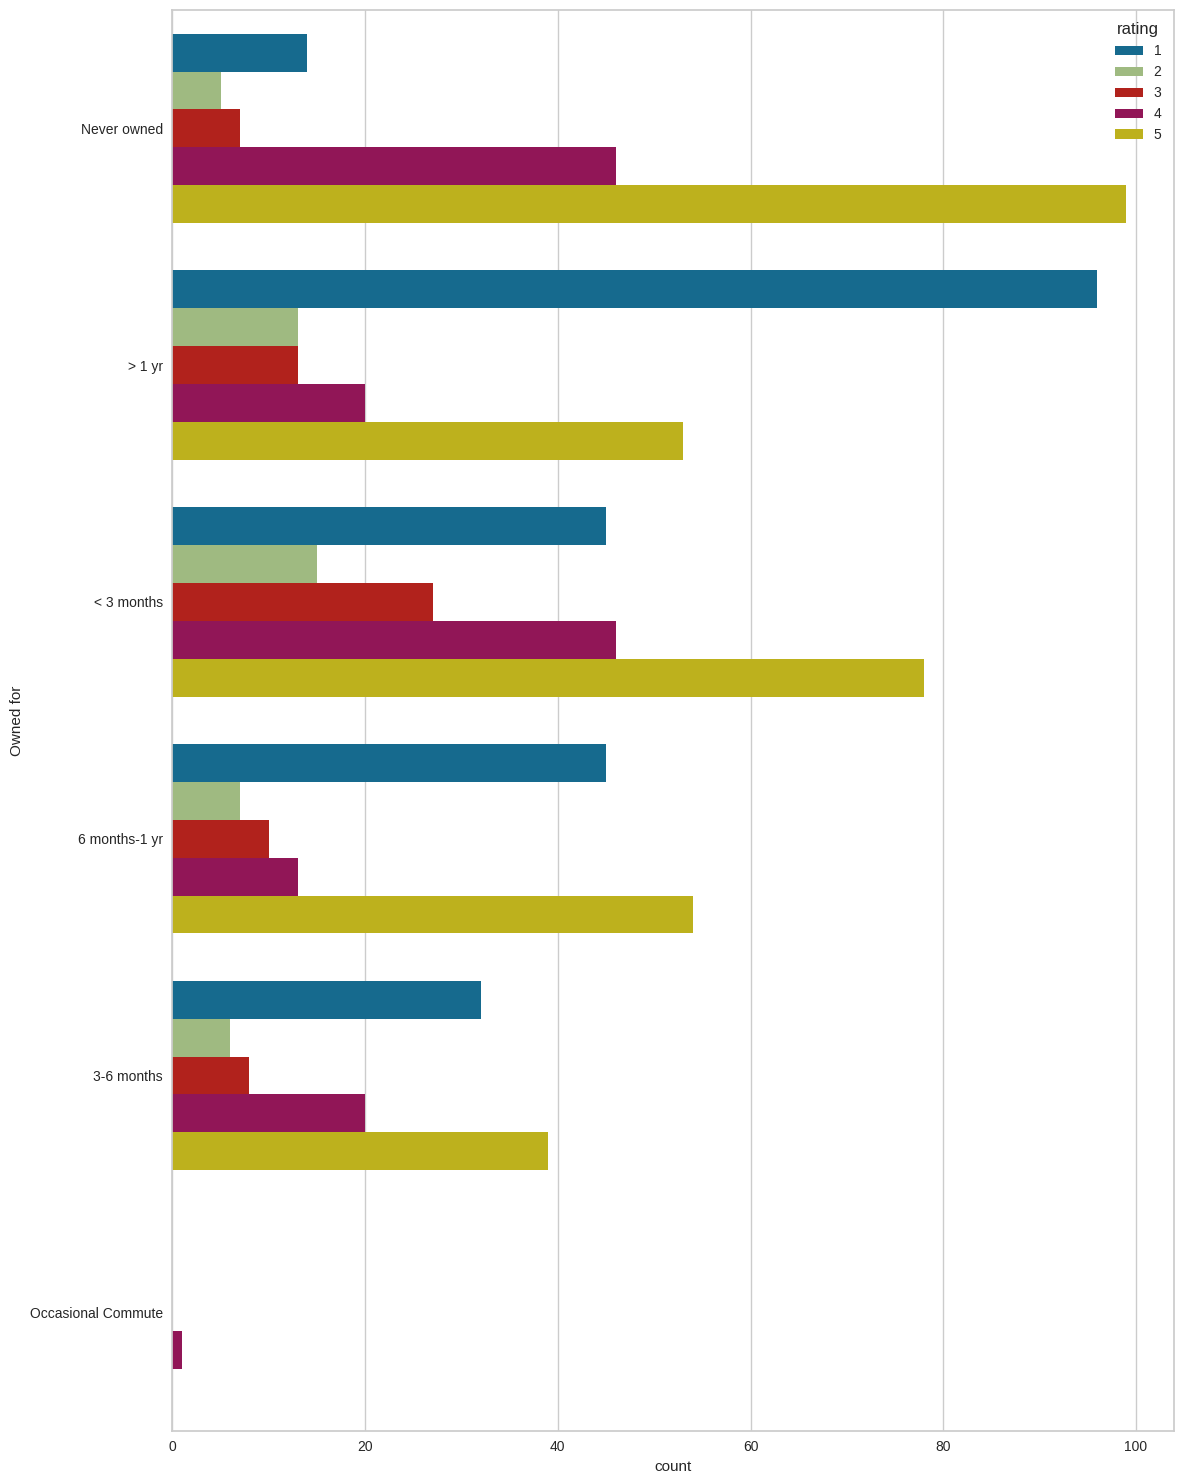

In [ ]:
plt.figure(figsize=(12,15))
sns.countplot(y='Owned for', data=df_e2w, hue='rating')
plt.show()

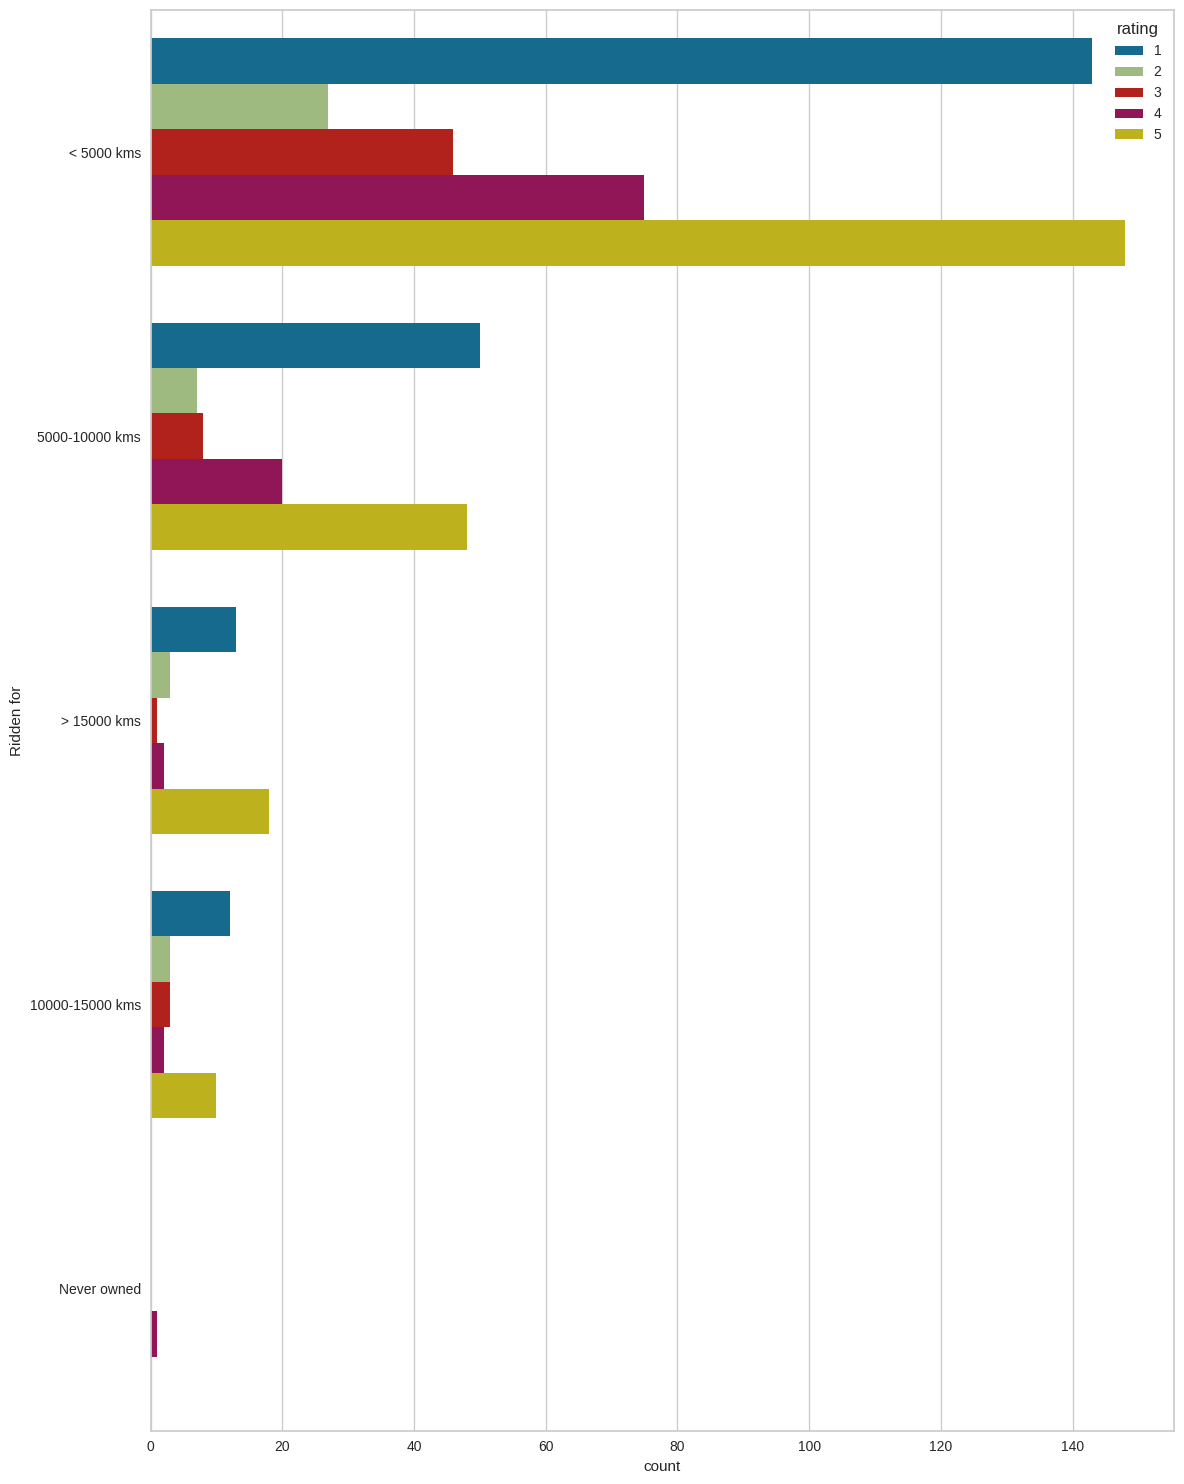

In [ ]:
plt.figure(figsize=(12,15))
sns.countplot(y='Ridden for', data=df_e2w, hue='rating')
plt.show()

In [ ]:
# Creating a copy of the data
df1 = df_e2w.copy()
df1.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Wanna buy this bike so i gave basic informatio...,Everything,Never owned,NaN,1,3.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN
1,This is simply amazing and exceptionally well ...,Everything,> 1 yr,< 5000 kms,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
2,"Battery life is good, I like this bike very mu...",Everything,< 3 months,< 5000 kms,5,4.0,4.0,5.0,3.0,NaN,4.0,NaN,NaN
3,I seen this bike on road. Very nice bike and g...,Everything,Never owned,NaN,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
4,I have a rv400 I have the bike for almost more...,Daily Commute,> 1 yr,5000-10000 kms,1,2.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN


In [ ]:
df1.drop(df1.iloc[:,1:],inplace=True, axis=1)
df1.head()

,review
0,Wanna buy this bike so i gave basic informatio...
1,This is simply amazing and exceptionally well ...
2,"Battery life is good, I like this bike very mu..."
3,I seen this bike on road. Very nice bike and g...
4,I have a rv400 I have the bike for almost more...


**Sentimenat Analysis of Reviews**

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
# Creating a function for cleaning the text
def clean(text):
  text = str(text).lower()
  text = re.sub('[^a-z]',' ', str(text))
  text = text.split()
  text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
  text = ' '.join(str(k) for k in (text))
  return text

In [ ]:
df1['review'][0]

"Wanna buy this bike so i gave basic information to the company to get response but only fraudsters calls me in the name of revolt for online fraud so there's a data leakage also besides this i've changed my mind to buy this after reading reviews of owners and company response.\nPathetic response from revolt."

In [ ]:
df1['review'][0:1].apply(clean)

0    wanna buy bike gave basic information company ...
Name: review, dtype: object

In [ ]:
# Creating a function to get polarity and subjectivity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def polarity(text):
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
df1['cleantext'] = df1['review'].apply(clean)
df1['subjectivity'] = df1['cleantext'].apply(subjectivity)
df1['polarity'] = df1['cleantext'].apply(polarity)
df1['analysis'] = df1['polarity'].apply(getAnalysis)
df1.head()

,review,cleantext,subjectivity,polarity,analysis
0,Wanna buy this bike so i gave basic informatio...,wanna buy bike gave basic information company ...,0.562500,-0.500000,Negative
1,This is simply amazing and exceptionally well ...,simply amazing exceptionally well good price s...,0.755000,0.429896,Positive
2,"Battery life is good, I like this bike very mu...",battery life good like bike much tension refue...,0.531845,0.313393,Positive
3,I seen this bike on road. Very nice bike and g...,seen bike road nice bike good drive pollution ...,0.718750,0.571875,Positive
4,I have a rv400 I have the bike for almost more...,rv bike almost year never ever bike gave avera...,0.386565,0.012415,Positive


In [ ]:
score = df1['analysis'].value_counts()
score

Positive    587
Negative    176
Neutral      49
Name: analysis, dtype: int64

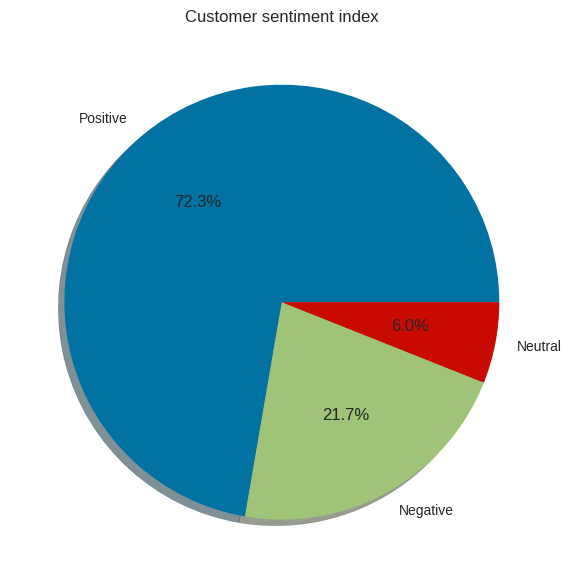

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(score, labels = ['Positive', 'Negative', 'Neutral'],shadow = True, autopct = '%1.1f%%')
plt.title('Customer sentiment index')
plt.show()

**WordCloud**

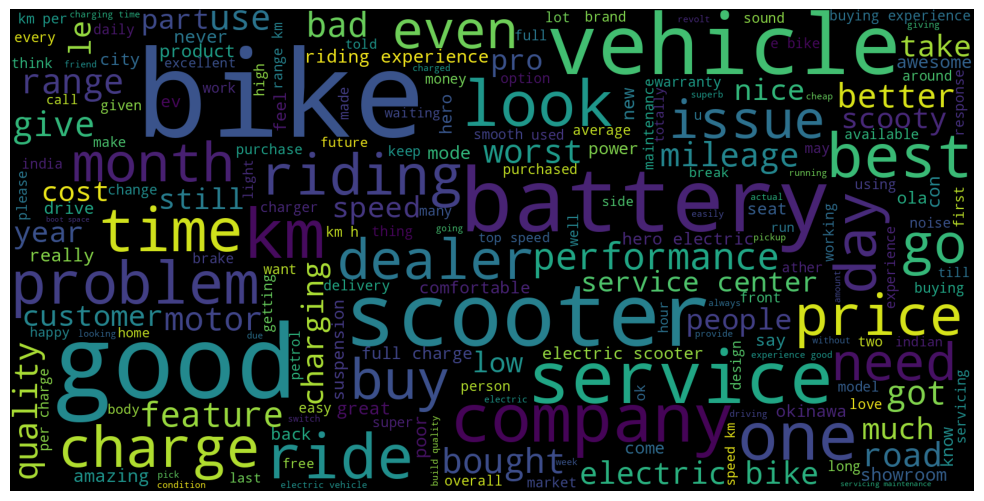

In [ ]:
# Creating a WordCloud
def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  all_words = ' '.join([text for text in wd_list])
  wordcloud = WordCloud(stopwords = STOPWORDS,
                        width=1600,height=800,
                        random_state=1,
                        max_words=200,
                        max_font_size=200).generate(all_words)
  plt.figure(figsize=(10,10))
  plt.axis('off')
  plt.imshow(wordcloud)
word_cloud(df1['cleantext'][:5000])

Some popular words that can be observed in the reviews include: bike, vehicle, scooter, good, battery, service, company, charge, best, price

In [ ]:
df2 = df_e2w.copy()
df2 = df2.iloc[:,5:]
df2=df2.fillna(0)
df2.head()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,3.0,1.0,3.0,1.0,4.0,0.0,0.0,0.0
1,5.0,5.0,5.0,5.0,0.0,5.0,0.0,0.0
2,4.0,4.0,5.0,3.0,0.0,4.0,0.0,0.0
3,5.0,5.0,5.0,5.0,0.0,5.0,0.0,0.0
4,2.0,1.0,1.0,2.0,0.0,3.0,0.0,0.0


**Principal Component Analysis**

In [ ]:
pca = PCA()
principal_components = pca.fit_transform(df2)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,0.917002,-2.270448,0.004381,-0.804342,1.571710,0.457088,-0.571666,0.082141
1,-3.099522,3.431168,-3.762932,1.970928,-1.616919,0.164016,-0.147870,-0.095315
2,-1.257067,2.092324,-3.446195,2.025984,-0.749243,-0.435970,-0.918969,-0.049931
3,-3.099522,3.431168,-3.762932,1.970928,-1.616919,0.164016,-0.147870,-0.095315
4,3.346936,1.277781,-2.233583,-0.086283,-0.873141,0.813738,0.357799,-0.031880


In [ ]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8']].std()

PCA1    3.723554
PCA2    1.967764
PCA3    1.435807
PCA4    1.035634
PCA5    0.907955
PCA6    0.776078
PCA7    0.637076
PCA8    0.609307
dtype: float64

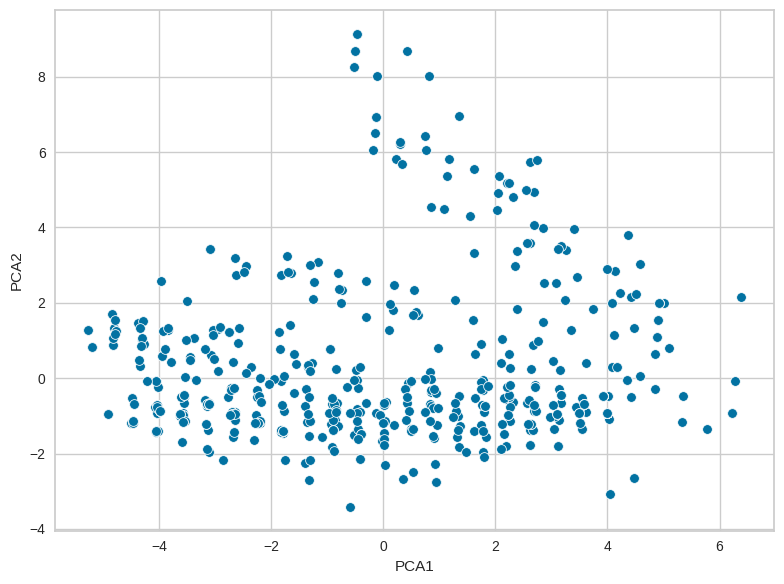

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',palette='deep')
plt.show()

**Segment Extraction using KMeans Clustering**

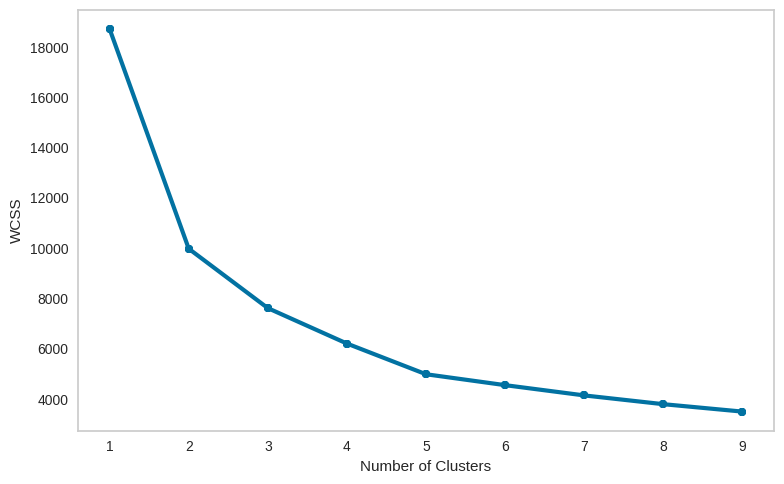

In [ ]:
# Using elbow method
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 10)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,10),wcss, marker = '8',linewidth='3')
plt.xlabel(range(1,10))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

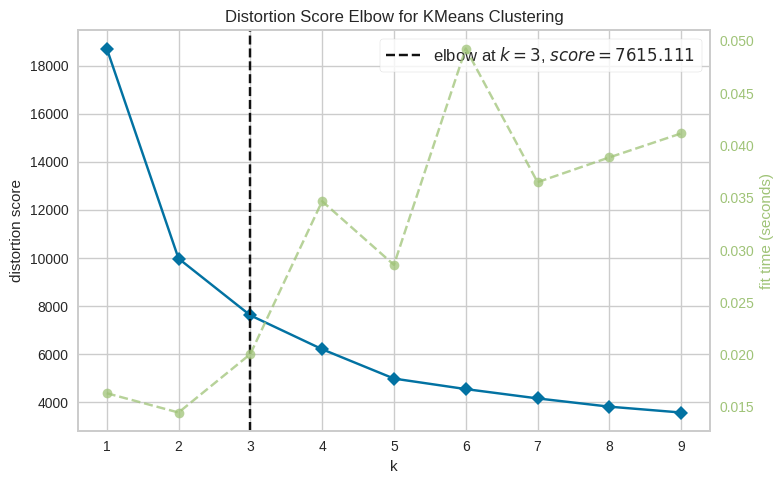

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
plt.figure(figsize=(8,5))
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans,k=(1,10))
visualizer.fit(df2)
visualizer.show()

It appears that there is an elbow at k = 3 clusters

In [ ]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,cluster
0,0.917002,-2.270448,0.004381,-0.804342,1.571710,0.457088,-0.571666,0.082141,2
1,-3.099522,3.431168,-3.762932,1.970928,-1.616919,0.164016,-0.147870,-0.095315,1
2,-1.257067,2.092324,-3.446195,2.025984,-0.749243,-0.435970,-0.918969,-0.049931,1
3,-3.099522,3.431168,-3.762932,1.970928,-1.616919,0.164016,-0.147870,-0.095315,1
4,3.346936,1.277781,-2.233583,-0.086283,-0.873141,0.813738,0.357799,-0.031880,2


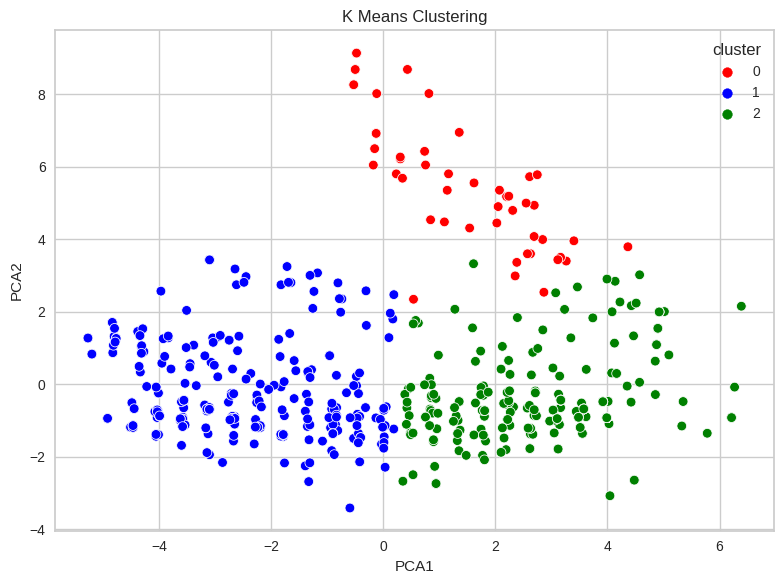

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster', data=pca_df_kmeans, palette=['red','blue','green'])
plt.title('K Means Clustering')
plt.show()

In [ ]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df2)
pca_df_kmeans1 = pd.concat([df_e2w,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans1 = pca_df_kmeans1.fillna(0)
pca_df_kmeans1.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,cluster
0,Wanna buy this bike so i gave basic informatio...,Everything,Never owned,0,1,3.0,1.0,3.0,1.0,4.0,0.0,0.0,0.0,2
1,This is simply amazing and exceptionally well ...,Everything,> 1 yr,< 5000 kms,5,5.0,5.0,5.0,5.0,0.0,5.0,0.0,0.0,1
2,"Battery life is good, I like this bike very mu...",Everything,< 3 months,< 5000 kms,5,4.0,4.0,5.0,3.0,0.0,4.0,0.0,0.0,1
3,I seen this bike on road. Very nice bike and g...,Everything,Never owned,0,5,5.0,5.0,5.0,5.0,0.0,5.0,0.0,0.0,1
4,I have a rv400 I have the bike for almost more...,Daily Commute,> 1 yr,5000-10000 kms,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,0.0,2


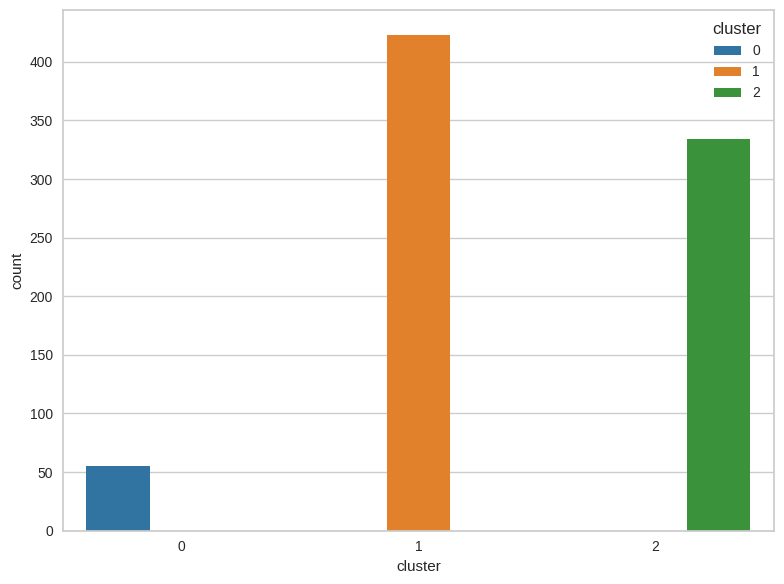

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster',data=pca_df_kmeans1, hue='cluster',palette='tab10')
plt.show()

In [ ]:
pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

1    52.093596
2    41.133005
0     6.773399
Name: cluster, dtype: float64

**Profiling and Describing Segments**

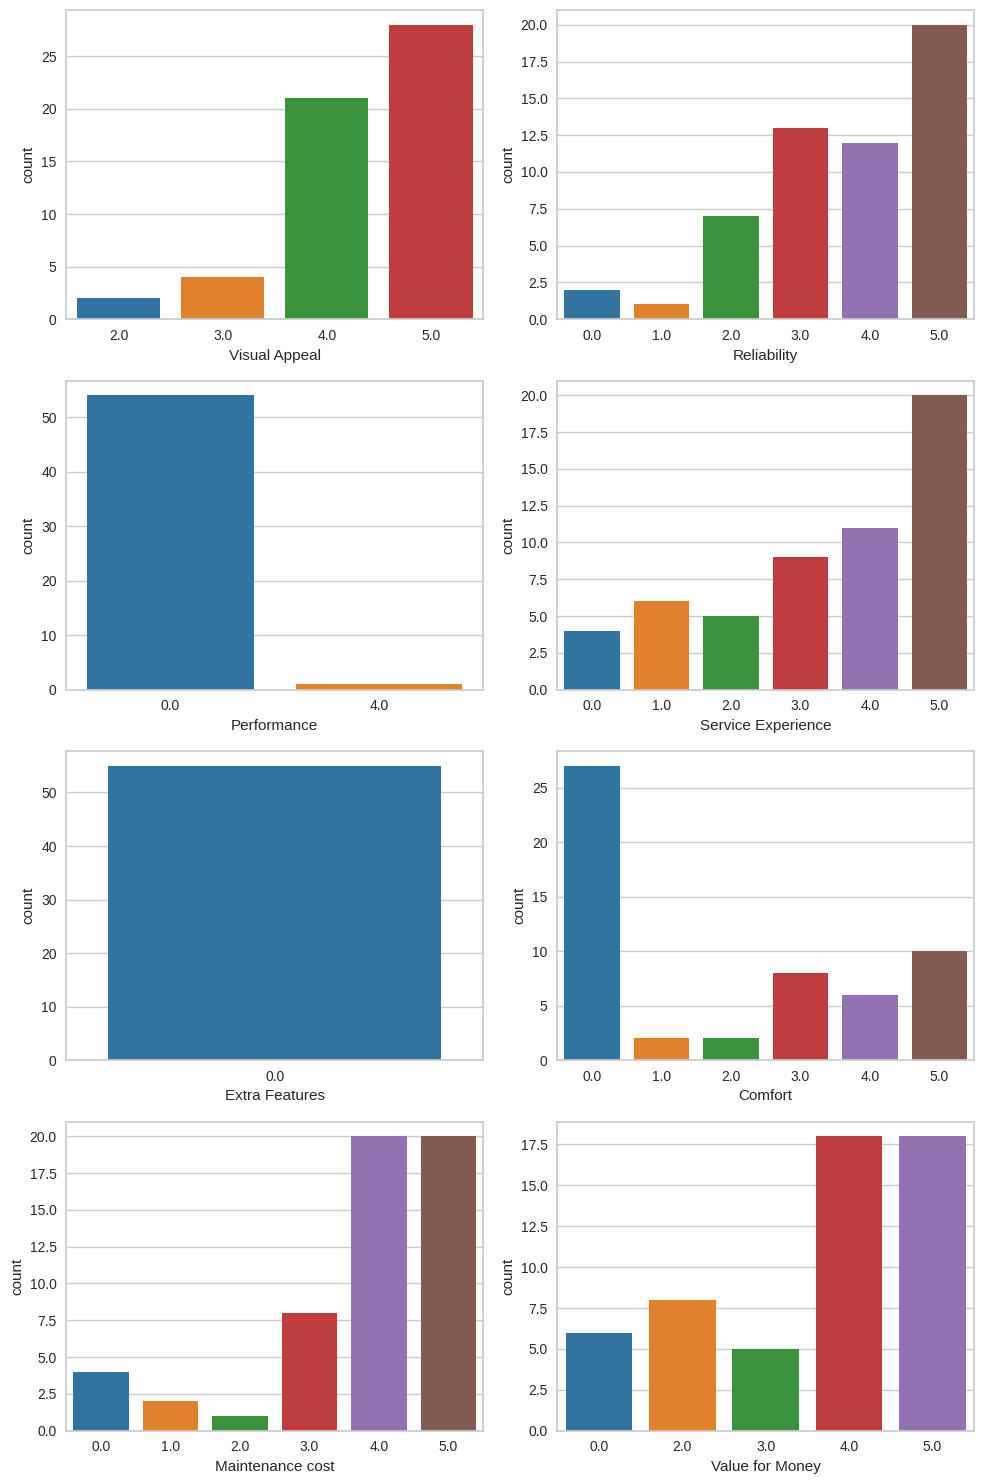

In [ ]:
# Analysis of Cluster 1
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Visual Appeal',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[0][0], palette='tab10')
sns.countplot(x='Reliability',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][0], palette='tab10')
sns.countplot(x='Service Experience',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[1][1], palette='tab10')
sns.countplot(x='Extra Features',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[2][1], palette='tab10')
sns.countplot(x='Maintenance cost',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[3][0], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax=axes[3][1], palette='tab10')
plt.show()

This cluster contains users who are satisfied with the Visual Appeal, Reliability, Service Experience, Maintenance cost and consider an E2W Value for money, but they have negative reviews regarding the Comfort, Performance and Extra Features.

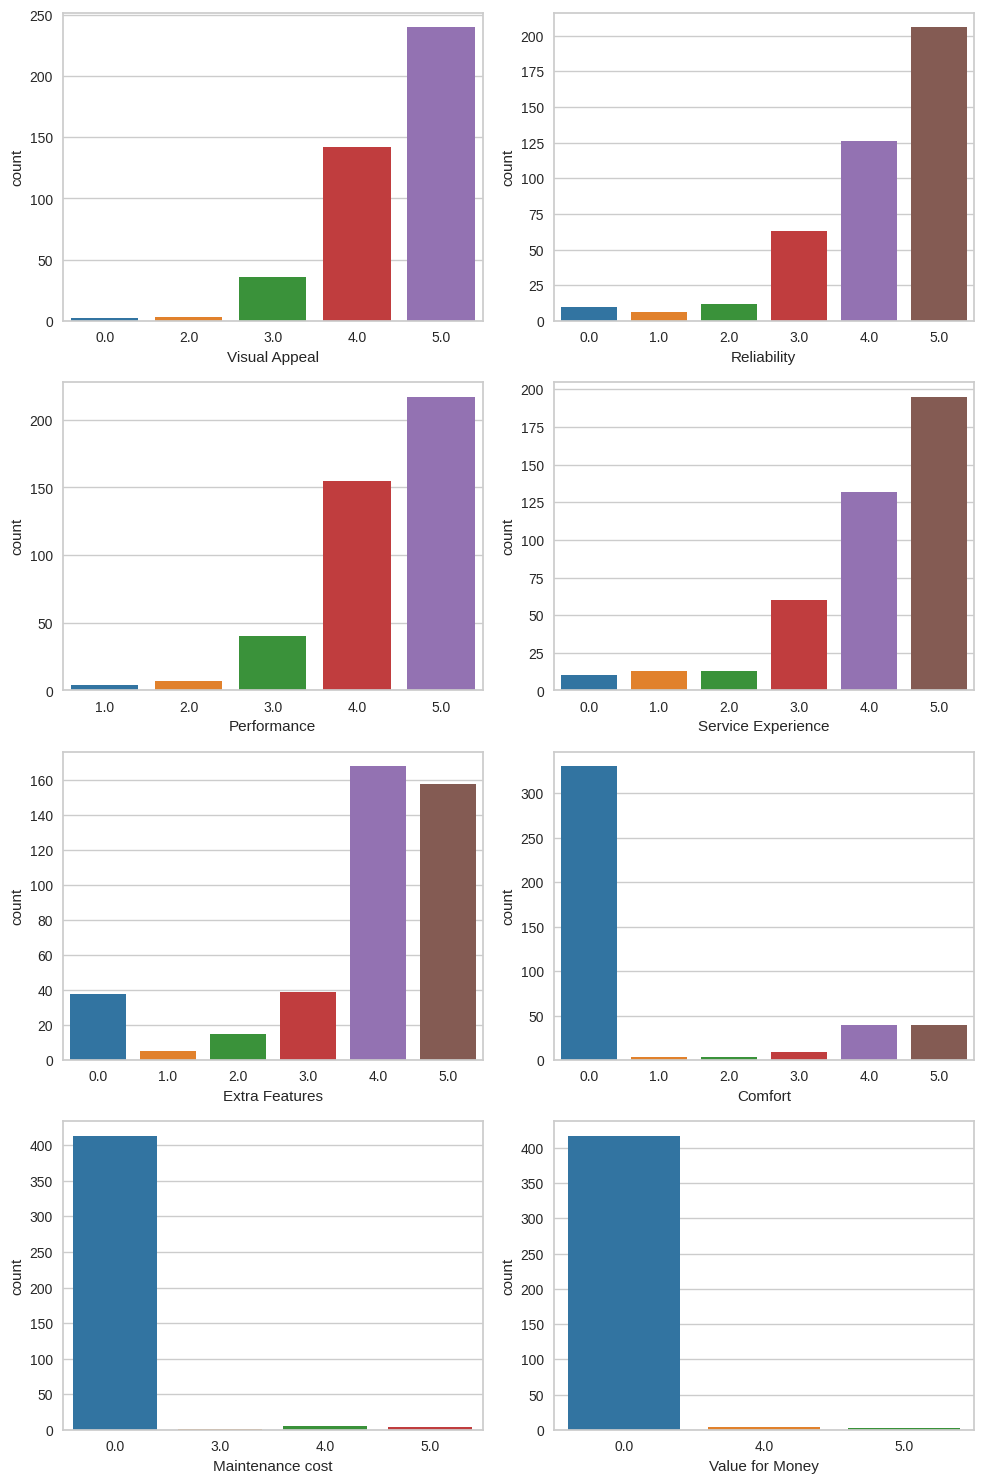

In [ ]:
# Analysis of Cluster 2
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Visual Appeal',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[0][0], palette='tab10')
sns.countplot(x='Reliability',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][0], palette='tab10')
sns.countplot(x='Service Experience',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[1][1], palette='tab10')
sns.countplot(x='Extra Features',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[2][1], palette='tab10')
sns.countplot(x='Maintenance cost',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[3][0], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax=axes[3][1], palette='tab10')
plt.show()

This cluster contains users who are satisfied with the Visual Appeal, Reliability, Service Experience, Performance and Extra Features, but they have negative reviews regarding the Maintenance cost, Comfort and do not consider an E2W Value for Money

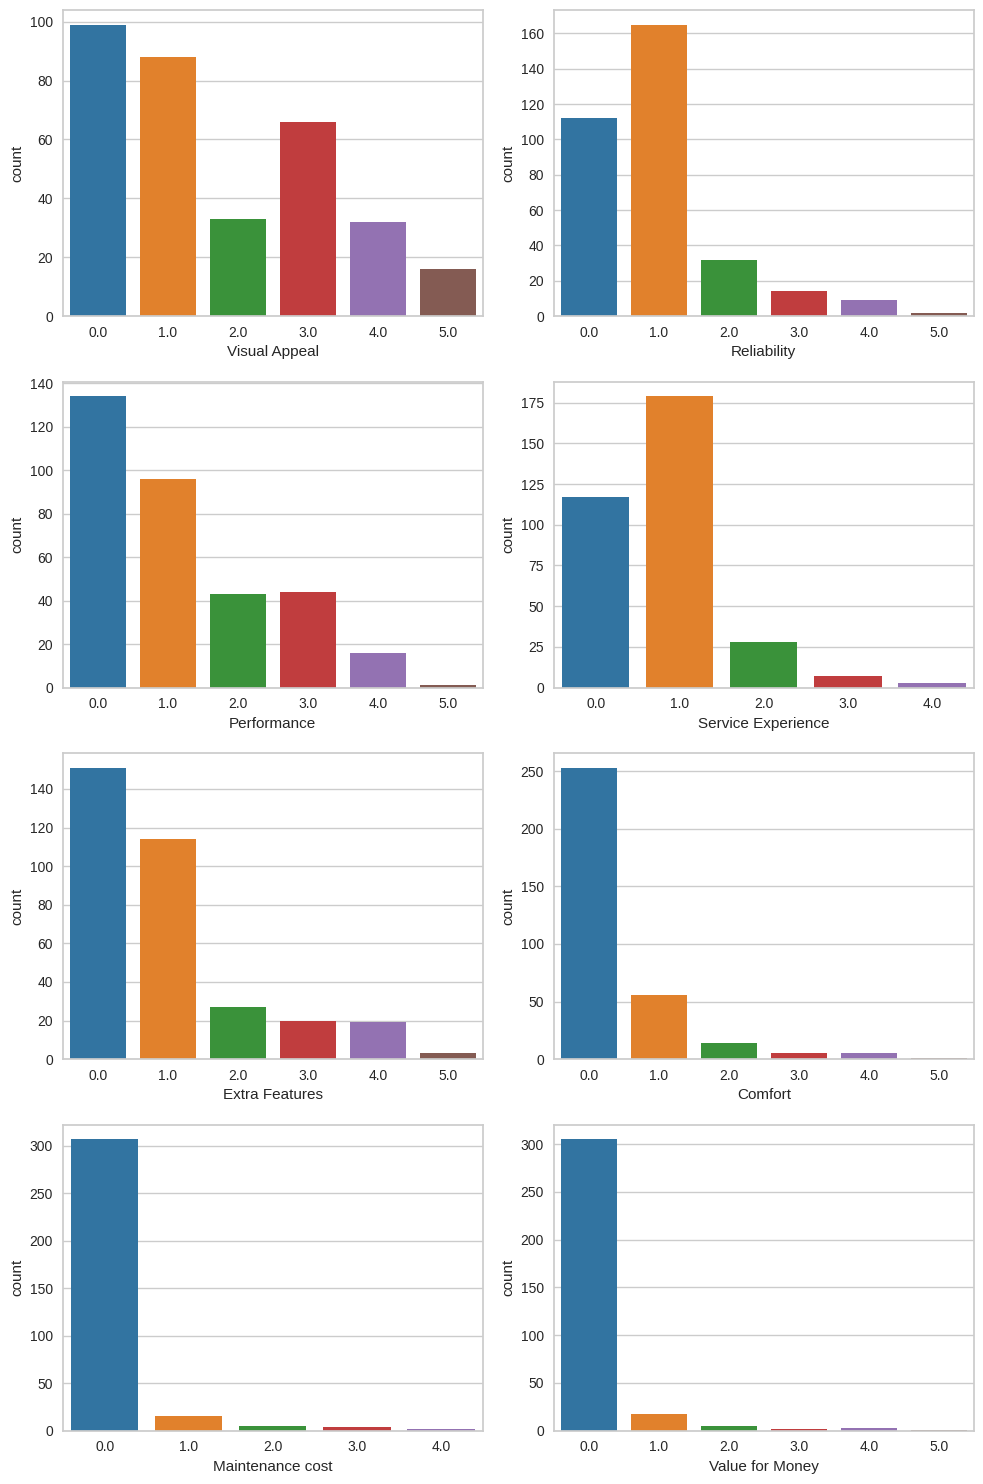

In [ ]:
# Analysis of Cluster 3
plt.rcParams['figure.figsize'] = [10,15]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(4,2)
sns.countplot(x='Visual Appeal',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[0][0], palette='tab10')
sns.countplot(x='Reliability',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[0][1], palette='tab10')
sns.countplot(x='Performance',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][0], palette='tab10')
sns.countplot(x='Service Experience',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[1][1], palette='tab10')
sns.countplot(x='Extra Features',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][0], palette='tab10')
sns.countplot(x='Comfort',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[2][1], palette='tab10')
sns.countplot(x='Maintenance cost',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[3][0], palette='tab10')
sns.countplot(x='Value for Money',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax=axes[3][1], palette='tab10')
plt.show()

This cluster contains negative reviews for all the attributes